# Binary Classification using CNNs

In [8]:
import arch.CNN
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import img_to_array
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

### Load and preprocess images for 'Not' poison ivy classifier

In [2]:
data_alexnet, labels_alexnet = arch.CNN.bi_pre_process(227, 227, 'C:\\Users\\jltsa\\Desktop\\Project_2\\binary_poison_ivy', 'poison_ivy')

### Split into test and training sets

In [3]:
#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_alexnet, labels_alexnet, test_size=0.25, random_state=42)

In [4]:
#One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Increase samples through augmentation

In [5]:
#To increase the amount of training data, build an image generator using data augmentation
aug_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                            height_shift_range=0.1, shear_range=0.2,
                            zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

### Train Model

In [6]:
#Initialize global training variables

EPOCHS = 25
#Learning rate
LR = 1e-3
#Batch Size
BS = 15

In [7]:
#Initialize model
model_alex = arch.CNN.AlexNet.build(width=227, height=227, depth=3, classes=2)
opt_alex = Adam(lr=LR, decay=LR / EPOCHS)

#if model has 2 classes use loss='binary_crossentropy'
model_alex.compile(loss='binary_crossentropy', optimizer='sgd',
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
alex_net = model_alex.fit_generator(aug_gen.flow(X_train, y_train, batch_size=BS),
                   validation_data=(X_test, y_test), steps_per_epoch=len(X_train // BS),
                   epochs=EPOCHS, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
587/587 [==============================] - 109s 185ms/step - loss: 0.6431 - acc: 0.6127 - val_loss: 0.6471 - val_acc: 0.5918
Epoch 2/25
587/587 [==============================] - 106s 180ms/step - loss: 0.5775 - acc: 0.6974 - val_loss: 0.5892 - val_acc: 0.7092
Epoch 3/25
587/587 [==============================] - 107s 182ms/step - loss: 0.5287 - acc: 0.7267 - val_loss: 0.6193 - val_acc: 0.6990
Epoch 4/25
587/587 [==============================] - 104s 177ms/step - loss: 0.4528 - acc: 0.7756 - val_loss: 0.5220 - val_acc: 0.6939
Epoch 5/25
587/587 [==============================] - 104s 177ms/step - loss: 0.4024 - acc: 0.8044 - val_loss: 0.5103 - val_acc: 0.7602
Epoch 6/25
587/587 [==============================] - 91s 155ms/step - loss: 0.3573 - acc: 0.8333 - val_loss: 0.5695 - val_acc: 0.7500
Epoch 7/25
587/587 [==============================] - 88s 151ms/step - loss: 0.3407 - acc: 0.8406 - val_loss: 0.4747 - val_acc: 0.8010
Ep

In [10]:
model_alex.save('models\\model_alex_notpoisonivy.h5')

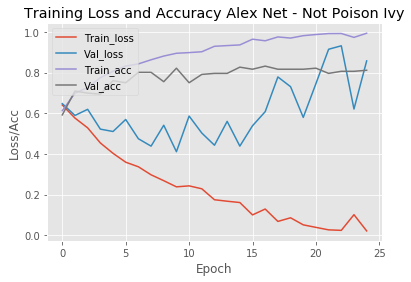

In [11]:
arch.CNN.plot_acc_loss(EPOCHS, alex_net, save=True, title='Alex Net - Not Poison Ivy', path='plots', save_as='not_poisonivy_alex')

model is over fitting to the training data around th 8-10th epoch

### Train Model and store opitmal parameters before over fitting

In [12]:
#Initialize model
model_alex_2 = arch.CNN.AlexNet.build(width=227, height=227, depth=3, classes=2)
#opt_alex = Adam(lr=LR, decay=LR / EPOCHS)

#if model has 2 classes use loss='binary_crossentropy'
model_alex_2.compile(loss='binary_crossentropy', optimizer='sgd',
             metrics=['accuracy'])

In [15]:
#create a checkpoint to store the best weights of the model
#to use these weights later, initialize the same model architecture that the weights were trained from
#then call model.load_weights('best_weights_alex.h5')
#can make predictions model.predict_classes(data)
checkpoint = ModelCheckpoint('best_weights_alex.h5', monitor='val_loss',
                            save_best_only=True)
callbacks_list=[checkpoint]

In [17]:
alex_net_2 = model_alex_2.fit_generator(aug_gen.flow(X_train, y_train, batch_size=BS),
                   validation_data=(X_test, y_test), steps_per_epoch=len(X_train // BS),
                   epochs=15, callbacks=callbacks_list, verbose=1)

Epoch 1/15
587/587 [==============================] - 95s 162ms/step - loss: 0.6152 - acc: 0.6462 - val_loss: 0.5843 - val_acc: 0.7245
Epoch 2/15
587/587 [==============================] - 91s 155ms/step - loss: 0.5470 - acc: 0.7167 - val_loss: 0.5649 - val_acc: 0.7194
Epoch 3/15
587/587 [==============================] - 93s 158ms/step - loss: 0.4655 - acc: 0.7604 - val_loss: 0.5576 - val_acc: 0.6684
Epoch 4/15
587/587 [==============================] - 99s 168ms/step - loss: 0.4038 - acc: 0.8041 - val_loss: 0.5759 - val_acc: 0.6531
Epoch 5/15
587/587 [==============================] - 90s 154ms/step - loss: 0.3773 - acc: 0.8242 - val_loss: 0.5195 - val_acc: 0.7857
Epoch 6/15
587/587 [==============================] - 90s 153ms/step - loss: 0.3366 - acc: 0.8444 - val_loss: 0.4385 - val_acc: 0.8112
Epoch 7/15
587/587 [==============================] - 91s 154ms/step - loss: 0.2962 - acc: 0.8664 - val_loss: 0.4603 - val_acc: 0.8112
Epoch 8/15
587/587 [==============================] - 8

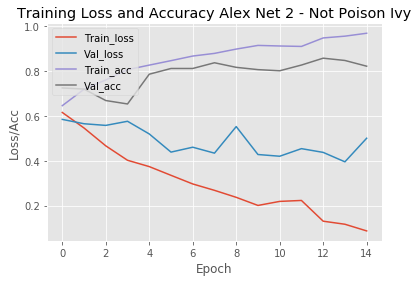

In [18]:
arch.CNN.plot_acc_loss(15, alex_net_2, save=True, title='Alex Net 2 - Not Poison Ivy', path='plots', save_as='not_poisonivy_alex')

In [19]:
model_alex_2.save('models\\model_alex_2_notpoisonivy.h5')

## Making predictions - Poison Ivy and NOT Poison Ivy

The second AlexNet model, model_alex_2 looks like it trained decently.  We will make some predictions with unseen images.

In [18]:
#make sure to load models like this in the future
#Instantiate the same model architecture and load weights

In [2]:
model = arch.CNN.AlexNet()

In [3]:
m = model.build(width=227, height=227, depth=3, classes=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
m.load_weights('models\\best_weights_alex.hdf5')

### Load images 

In [63]:
#image paths
ivy1 = 'C:\\Users\\jltsa\\Desktop\\Project_2\\test_images\\poison_ivy\\ivy1.jpg'
ivy4 = 'C:\\Users\\jltsa\\Desktop\\Project_2\\test_images\\poison_ivy\\ivy4.jpg'
ivy3 = 'C:\\Users\\jltsa\\Desktop\\Project_2\\test_images\\poison_ivy\\ivy3.jpg'
leaves = 'C:\\Users\\jltsa\\Desktop\\Project_2\\test_images\\not_poisonous\\leaves.jpg'
flower = 'C:\\Users\\jltsa\\Desktop\\Project_2\\test_images\\not_poisonous\\flower.jpg'
maple = 'C:\\Users\\jltsa\\Desktop\\Project_2\\test_images\\not_poisonous\\maple_leaf.jpg'

In [40]:
def display_im(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [51]:
#Load image and make a copy for later use
def make_prediction(path, model):
    image = cv2.imread(path,cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    orig_im = image.copy()
    #pre-process image
    image = cv2.resize(image, (227,227))
    image = image.astype('float') / 255.0
    image = img_to_array(image)
    #get image dimensions right to feed into model
    image = np.expand_dims(image, axis=0)
    
    #get prediction
    poison_ivy, not_poison_ivy = model.predict(image)[0]
    
    #make label
    label = "Poison Ivy" if poison_ivy > not_poison_ivy else "Not Poison Ivy"
    proba = poison_ivy if poison_ivy > not_poison_ivy else not_poison_ivy
    label = "{}: {:.2f}%".format(label, proba*100)
    
    output = imutils.resize(orig_im, width=400)
    cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
               0.7, (0, 255, 0), 2)
    
    plt.imshow( output)
    plt.show()

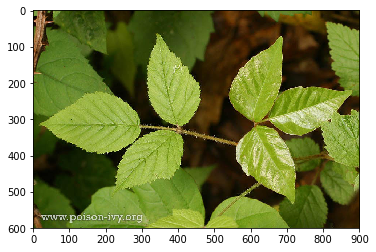

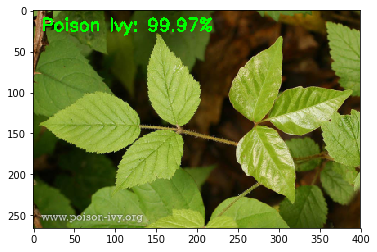

In [52]:
display_im(ivy1)
make_prediction(ivy1, m)


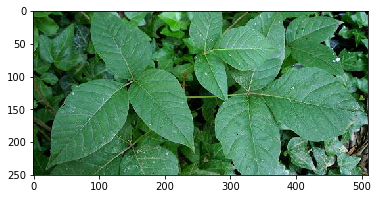

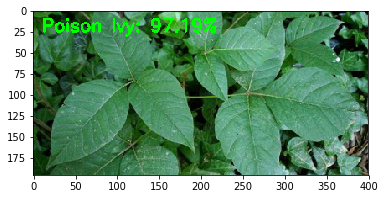

In [53]:
display_im(ivy3)
make_prediction(ivy3, m)

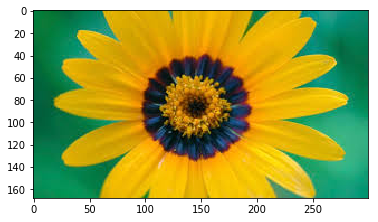

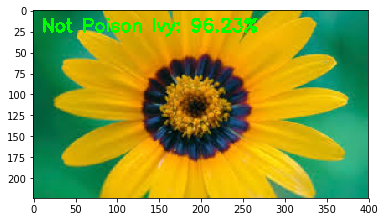

In [54]:
display_im(flower)
make_prediction(flower, m)

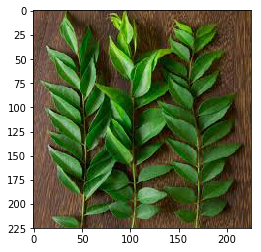

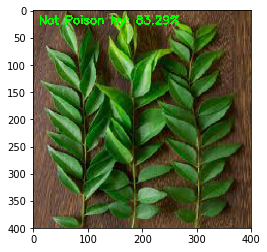

In [59]:
display_im(leaves)
make_prediction(leaves, m)

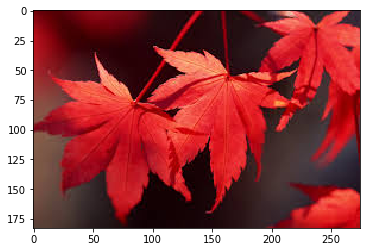

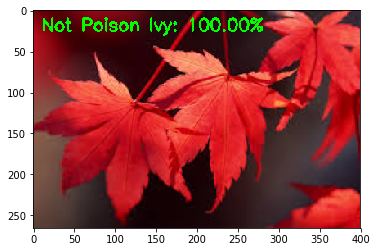

In [58]:
display_im(maple)
make_prediction(maple, m)

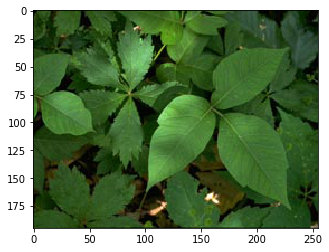

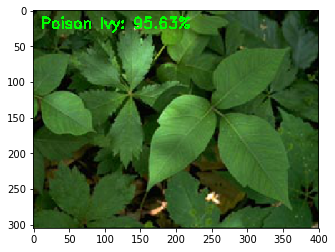

In [64]:
display_im(ivy4)
make_prediction(ivy4, m)